In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv('/content/cement_slump.csv')

In [5]:
df.head(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


#Loading data and EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [8]:
df.shape

(103, 10)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [10]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(ascending= False) [1:]

,Compressive Strength (28-day)(Mpa)
Cement,0.445656
Fly ash,0.444380
SP,-0.037909
FLOW(cm),-0.124189
Fine Aggr.,-0.154532
Coarse Aggr.,-0.160610
SLUMP(cm),-0.223499
Water,-0.254320
Slag,-0.331522


<Axes: >

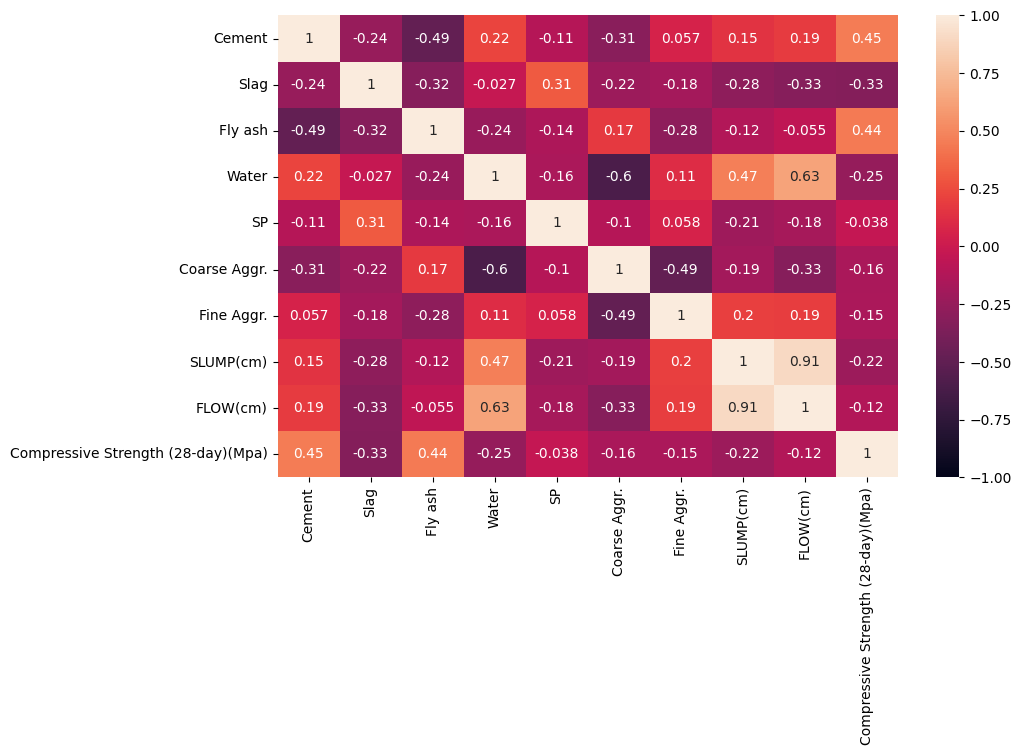

In [13]:
plt.figure(figsize=(10,6) , dpi = 100)

sns.heatmap(df.corr(), annot=True , vmin = -1 , vmax = 1)

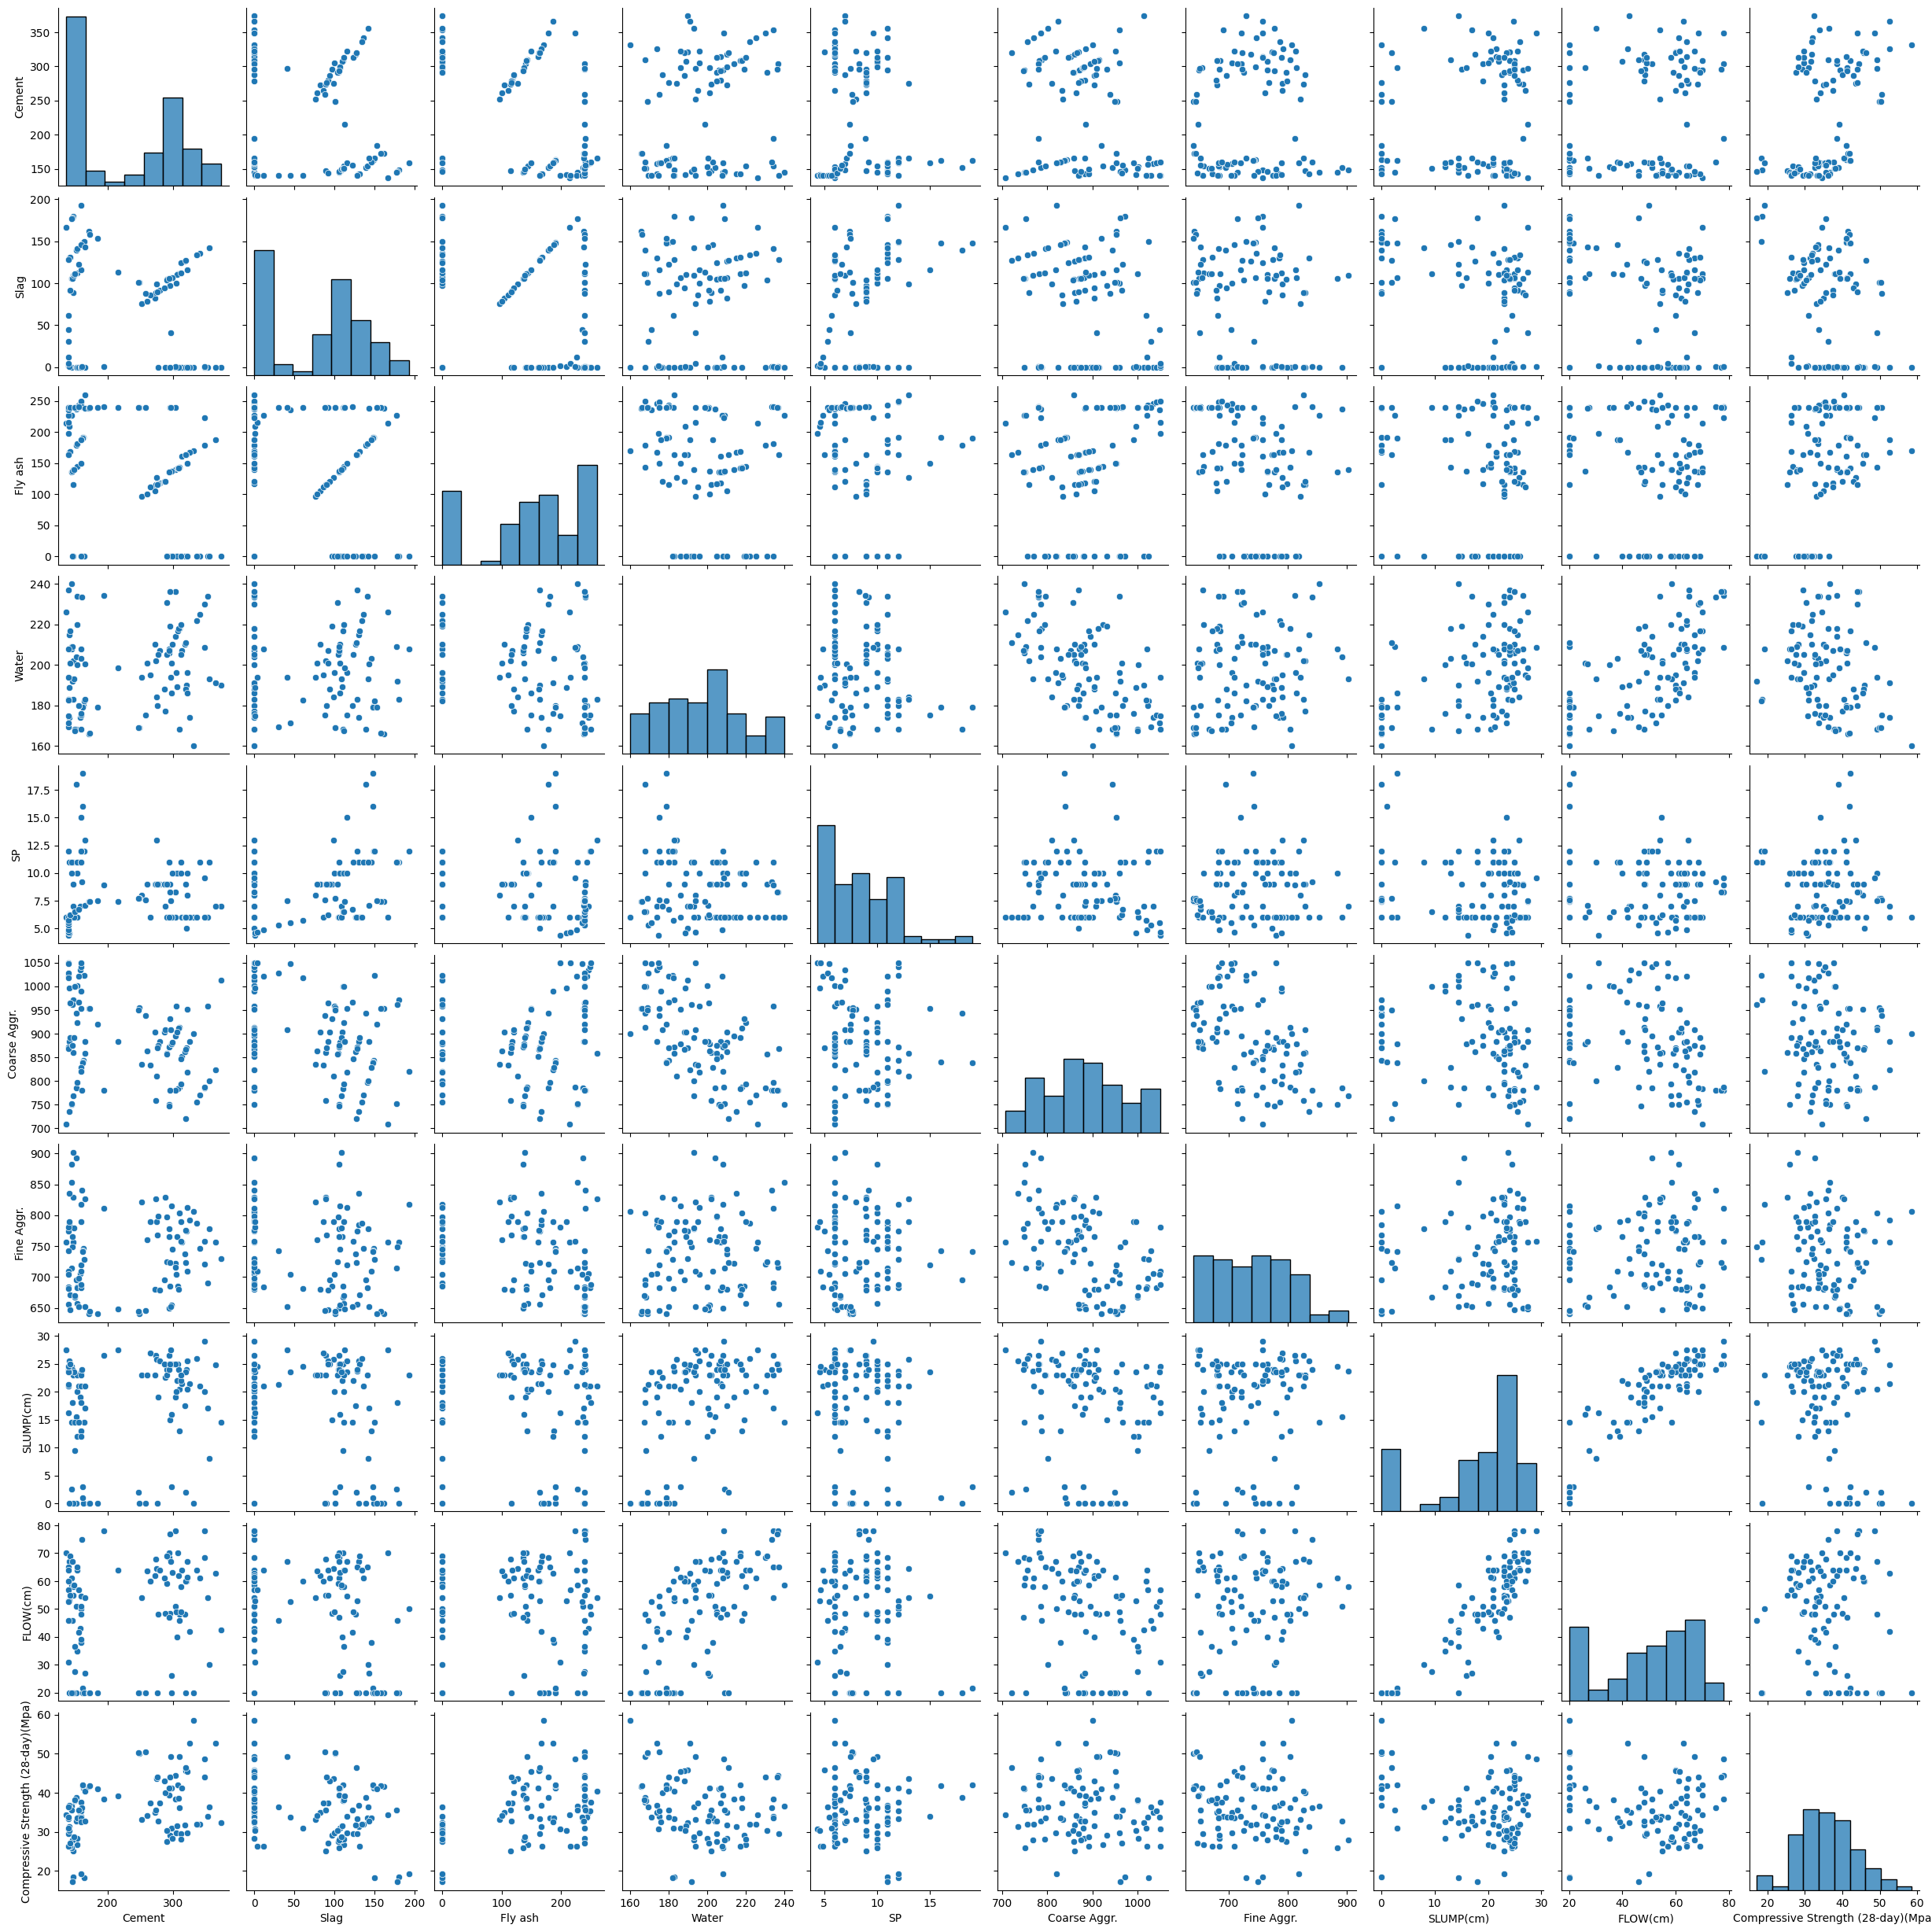

In [14]:
sns.pairplot(df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cement'),
  Text(1, 0, 'Slag'),
  Text(2, 0, 'Fly ash'),
  Text(3, 0, 'Water'),
  Text(4, 0, 'SP'),
  Text(5, 0, 'Coarse Aggr.'),
  Text(6, 0, 'Fine Aggr.'),
  Text(7, 0, 'SLUMP(cm)'),
  Text(8, 0, 'FLOW(cm)'),
  Text(9, 0, 'Compressive Strength (28-day)(Mpa)')])

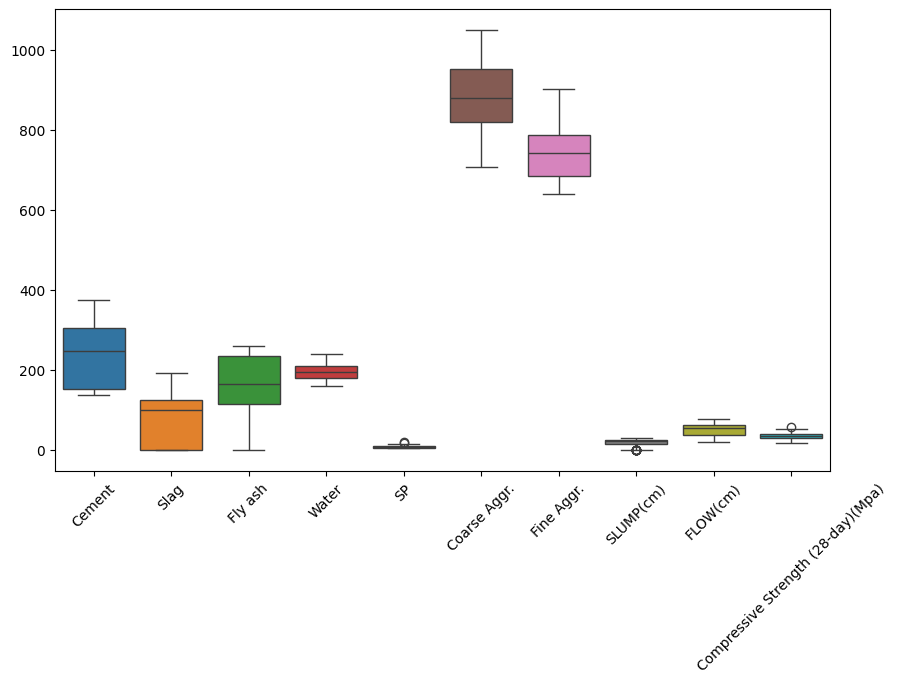

In [16]:
plt.figure(figsize=(10,6) , dpi = 100)
sns.boxplot(data=df)
plt.xticks(rotation=45)

#Variance inflation Factor

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
X= df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [19]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [21]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [23]:
vif_data

,feature,VIF
0,Cement,14.519378
1,Slag,4.701056
2,Fly ash,6.539719
3,Water,165.730216
4,SP,12.378538
5,Coarse Aggr.,57.562954
6,Fine Aggr.,97.849328
7,SLUMP(cm),39.144890
8,FLOW(cm),90.649065


#Train and split

In [24]:
X= df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y= df['Compressive Strength (28-day)(Mpa)']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

#Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler , MaxAbsScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression

In [31]:
  from sklearn.pipeline import Pipeline
  from sklearn.linear_model import LinearRegression

In [32]:
llm = LinearRegression()

In [45]:
pipe_lm = Pipeline([('scaler', scaler), ('llm', llm)])

In [34]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('llm', LinearRegression())])

In [35]:
y_pred = pipe_lm.predict(X_test)
y_train_pred = pipe_lm.predict(X_train)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
def train_val(y_train , y_train_pred , y_test , y_pred , model_name  ):
   scores = { model_name +" _train " : {'R2' : r2_score(y_train , y_train_pred),
                                        'MAE' : mean_absolute_error(y_train , y_train_pred),
                                        'MSE' : mean_squared_error(y_train , y_train_pred),
                                        'RMSE' : np.sqrt(mean_squared_error(y_train , y_train_pred)),
                                        'MAPE' : mean_absolute_percentage_error(y_train , y_train_pred)
                                        },

   model_name +" _test " : {'R2' : r2_score(y_test ,  y_pred  ),
                            'MAE' : mean_absolute_error(y_test , y_pred),
                            'MSE' : mean_squared_error(y_test , y_pred),
                            'RMSE' : np.sqrt(mean_squared_error(y_test , y_pred)),
                            'MAPE' : mean_absolute_percentage_error(y_test , y_pred)
                            }
   }
   return  pd.DataFrame(scores)


In [38]:
ls = train_val(y_train , y_train_pred , y_test , y_pred , 'Linear Regression')
ls

,Linear Regression _train,Linear Regression _test
R2,0.907145,0.911967
MAE,1.936263,1.740383
MSE,5.874313,4.454237
RMSE,2.423698,2.110506
MAPE,0.056114,0.047230


#Cross validation

In [40]:
from sklearn.model_selection import cross_validate , cross_val_score

In [41]:
model = Pipeline([('scaler', scaler), ('llm', llm)])
scores = cross_validate(model, X_train, y_train , cv=5, scoring=['r2', 'neg_mean_squared_error'])

In [42]:
pd.DataFrame(scores )

,fit_time,score_time,test_r2,test_neg_mean_squared_error
0,0.010003,0.003867,0.942208,-4.645188
1,0.005401,0.003412,0.706629,-10.756658
2,0.005830,0.003401,0.865934,-3.725762
3,0.006276,0.003530,0.923166,-8.434009
4,0.005743,0.003408,0.792889,-11.698265


In [46]:
pipe_lm['llm'].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

#Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

In [48]:
ridge_model = Ridge( alpha =1 , random_state=42)

In [49]:
pipe_ridge  = Pipeline([('scaler', scaler), ('ridge_model', ridge_model)])

In [50]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge_model', Ridge(alpha=1, random_state=42))])

In [51]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [52]:
rs = train_val(y_train , y_train_pred , y_test , y_pred , 'Ridge Regression')
rs

,Ridge Regression _train,Ridge Regression _test
R2,0.906392,0.911204
MAE,1.938096,1.732472
MSE,5.921967,4.492822
RMSE,2.433509,2.119628
MAPE,0.055908,0.046877


In [54]:
pd.concat([ls , rs] , axis =1)

,Linear Regression _train,Linear Regression _test,Ridge Regression _train,Ridge Regression _test
R2,0.907145,0.911967,0.906392,0.911204
MAE,1.936263,1.740383,1.938096,1.732472
MSE,5.874313,4.454237,5.921967,4.492822
RMSE,2.423698,2.110506,2.433509,2.119628
MAPE,0.056114,0.047230,0.055908,0.046877
